<a href="https://colab.research.google.com/github/Kh0uloud/recruiting-sw-project/blob/main/Driveless_Project1_Boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/78.2 GB disk)


In [2]:
!unzip -q ../train_data_agh_racing.zip -d ../

In [3]:
import os
print(os.getcwd())

/content/yolov5


In [4]:
# Train YOLOv5s on cone_data (kth folder) for 180 epochs
!python train.py --img 640 --batch 16 --epochs 180 --data /content/cone_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/cone_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=180, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

In [67]:
import torch
import torchvision.transforms as transforms
import cv2
import numpy as np

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirement "setuptools>=65.5.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


416

         xmin        ymin        xmax        ymax  confidence  class  \
0   50.006687  160.232819  107.631622  283.865723    0.311172      2   
1  291.264832   97.225243  361.572113  196.380051    0.279154      2   

          name  
0  orange_cone  
1  orange_cone  
50 160 157 444 (0, 0, 255)
291 97 652 293 (0, 0, 255)


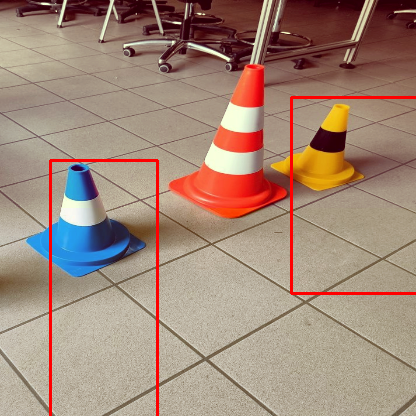

In [102]:
from google.colab.patches import cv2_imshow

def preprocess_image(img_path, input_size):
    # Load image using OpenCV
    img = cv2.imread(img_path)
    # Resize image to input size
    img = cv2.resize(img, (input_size, input_size))
    return img

#Extract the shape of training/testing data
image_shape = cv2.imread("/content/train_data_agh_racing/test/images/BME_00228_jpg.rf.eab8911e38e78bbb32e0560cef1d7d51.jpg")

# Load test image and preprocess
image = preprocess_image('/content/recovered.png', image_shape.shape[0])

# Pass image through model and obtain predictions
results = model(image)

print(results.pandas().xyxy[0])

# Define the bounding boxes (left, top, width, height) and corresponding class labels and scores
boxes = ((results.pandas().xyxy[0]).drop(['confidence', 'class', 'name'], axis=1)).values.tolist()
class_labels = (results.pandas().xyxy[0])['name'].values.tolist()  # Example class labels
scores = (results.pandas().xyxy[0])['confidence'].values.tolist()  # Example scores

# Define the colors for each class label
class_colors = {"blue_cone": (255, 0, 0), "large_orange_cone": (0, 255, 0), "orange_cone": (0, 0, 255)}  # Example colors

# Draw the bounding boxes on the image
for box, class_label, score in zip(boxes, class_labels, scores):
    left, top, width, height = box
    right, bottom = left + width, top + height
    left= int(left)
    top= int(top)
    right= int(right)
    bottom= int(bottom)
    color = class_colors[class_label]
    print(left, top, right, bottom, color)
    cv2.rectangle(image, (left, top), (right, bottom), color, 2)
    #cv2.putText(image, f"{class_label}: {score:.2f}", (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image with bounding boxes
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()